# Tennis analysis

### Introduction
Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal

Clearly state the question you will try to answer with your project

Identify and describe the dataset that will be used to answer the question

### Preliminary exploratory data analysis
Demonstrate that the dataset can be read from the web into R 

Clean and wrangle your data into a tidy format

**Using only training data**, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 

**Using only training data**, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

In [12]:

# loading libraries

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
library(stringr)
library(ggplot2)
library(scales)

set.seed(420)
options(repr.matrix.max.rows = 10)

In [13]:
##choosen dataset:
tennis_stats_data <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")

##rename the columes name so that there is no spaces
colnames(tennis_stats_data) = make.names(colnames(tennis_stats_data))
tennis_stats_data

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current.Rank,Best.Rank,Name,Backhand,Prize.Money,⋯,Facebook,Twitter,Nicknames,Grand.Slams,Davis.Cups,Web.Site,Team.Cups,Olympics,Weeks.at.No..1,Tour.Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
495,20 (13-04-1999),France,Right-handed,Wikipedia,382 (95),380 (11-11-2019),Dan Added,Two-handed,"$57,943",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",⋯,1.Dominic.Thiem,@ThiemDomi,Dominator,NA,NA,dominicthiem.tennis,NA,NA,NA,NA
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
colnames(tennis_stats_data)

[1] "...1"             "Age"              "Country"          "Plays"           
 [5] "Wikipedia"        "Current.Rank"     "Best.Rank"        "Name"            
 [9] "Backhand"         "Prize.Money"      "Height"           "Favorite.Surface"
[13] "Turned.Pro"       "Seasons"          "Active"           "Current.Elo.Rank"
[17] "Best.Elo.Rank"    "Peak.Elo.Rating"  "Last.Appearance"  "Titles"          
[21] "GOAT.Rank"        "Best.Season"      "Retired"          "Masters"         
[25] "Birthplace"       "Residence"        "Weight"           "Coach"           
[29] "Facebook"         "Twitter"          "Nicknames"        "Grand.Slams"     
[33] "Davis.Cups"       "Web.Site"         "Team.Cups"        "Olympics"        
[37] "Weeks.at.No..1"   "Tour.Finals"

In [15]:

tennis_cleaned_data <- tennis_stats_data |>
                select(Prize.Money, Age, Country, Plays, Backhand, Height, Current.Rank)|>
                mutate(across(Prize.Money: Current.Rank, function(col) {str_extract(col, "^[^ ]+")}))|> #remove any special character and adjust the cellk
                mutate(Prize.Money = as.numeric(gsub("[^0-9.]+", "", Prize.Money)))|> #changing the prize money into number by removing special characters
                mutate(Age = as.numeric(Age))|>
                mutate(across(Height:Current.Rank, as.numeric))|>  # convert chr to dbl for the rest of the columes
                mutate(across(Country:Backhand, as.factor))

tennis_cleaned_data

Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
NA,26,Brazil,Right-handed,NA,NA,378
59040,18,United,Left-handed,Two-handed,NA,326
3261567,32,Slovakia,Right-handed,Two-handed,185,178
374093,21,"Korea,",Right-handed,Two-handed,NA,236
6091971,27,Australia,Right-handed,Two-handed,193,183
⋮,⋮,⋮,⋮,⋮,⋮,⋮
57943,20,France,Right-handed,Two-handed,NA,382
22132368,26,Austria,Right-handed,One-handed,185,5
NA,23,Netherlands,Left-handed,NA,NA,495


In [16]:
#splitting the data into traning set and testing set
tennis_split <- initial_split(tennis_cleaned_data, prop = 0.75, strata = Current.Rank)

tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)


tennis_train
     

Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
74927,20,Finland,Right-handed,Two-handed,NA,104
NA,23,Russian,Right-handed,Two-handed,NA,4
1285541,20,Serbia,Right-handed,Two-handed,NA,54
2722314,22,United,Right-handed,Two-handed,NA,34
11912152,32,United,Right-handed,Two-handed,198,45
⋮,⋮,⋮,⋮,⋮,⋮,⋮
354975,32,India,Right-handed,Two-handed,NA,416
57943,20,France,Right-handed,Two-handed,NA,382
NA,23,Netherlands,Left-handed,NA,NA,495


In [17]:
summary_num <-tennis_train |>
                select(where(is.numeric)) |>
                pivot_longer(everything(), names_to = "var", values_to = "val") |>
                filter(!is.na(val)) |>
                group_by(var) |>
                summarise(count = n(), mean = mean(val, na.rm = TRUE)) |>
                mutate(mean = round(mean, digits = 2), percentage_missing = (1- count/373)*100) 


observation_percentage_missing <- summary_num |>
                select(-count, -mean) |>
                mutate(percentage_missing = round(percentage_missing, digits = 2))

observation_percentage_missing 


mean_value <- summary_num |>
                select(-count, -percentage_missing)|>
                mutate(mean = round(mean, digits = 2)) |>
                pivot_wider(names_from = var, values_from = mean) |>
rename("Mean value of Age" = "Age",
         "Mean value of Current Rank" = "Current.Rank",
         "Mean value of Height" = "Height",
         "Mean value of Prize Money" = "Prize.Money")

mean_value



observation_factor <- tennis_train |>
                    select(where(is.factor)) |>
                    pivot_longer(everything(), names_to = "var", values_to = "val") |>
                    filter(!is.na(val)) |>
                    group_by(var) |>
                    summarise(observation_count = n()) |>
                    mutate(na_count = 373 - observation_count)
                    

observation_factor


var,percentage_missing
<chr>,<dbl>
Age,0.00
Current.Rank,0.80
Height,76.68
Prize.Money,19.57


Mean value of Age,Mean value of Current Rank,Mean value of Height,Mean value of Prize Money
<dbl>,<dbl>,<dbl>,<dbl>
25.89,249.01,185.63,2316067


var,observation_count,na_count
<chr>,<int>,<dbl>
Backhand,308,65
Country,373,0
Plays,339,34


In [18]:
# Constant for theme of graph
color_palette <- brewer.pal(12, "Dark2")
opacity <- 0.4



Warning message in brewer.pal(12, "Dark2"):
“n too large, allowed maximum for palette Dark2 is 8
Returning the palette you asked for with that many colors
”


First, we want to see how the numeric variable relate to current rank

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 286 rows containing missing values (geom_point).”


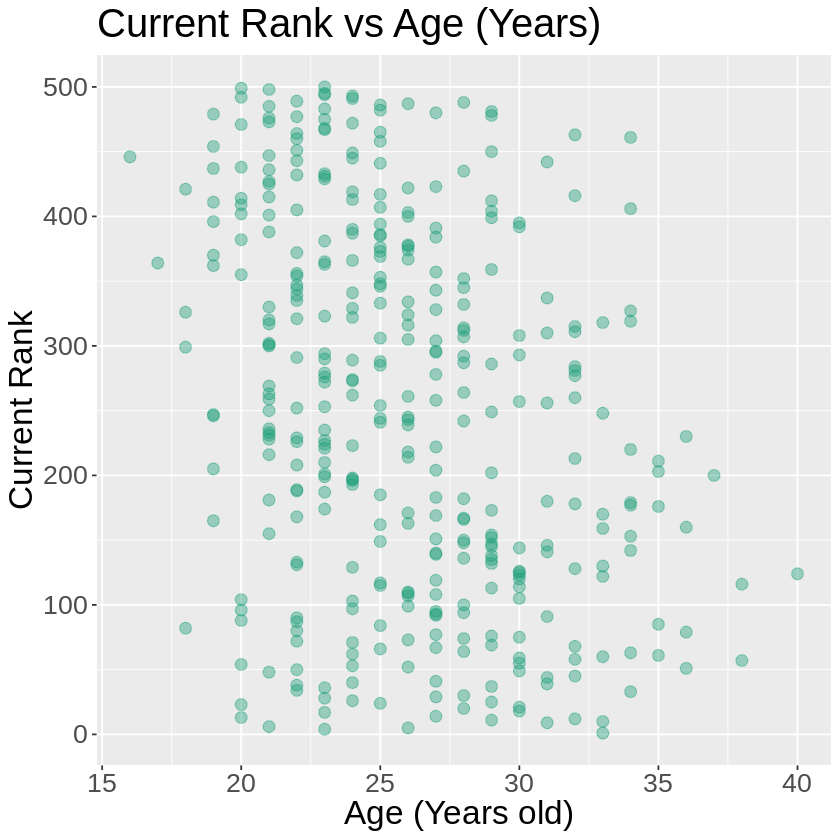

Warning message:
“Removed 73 rows containing missing values (geom_point).”


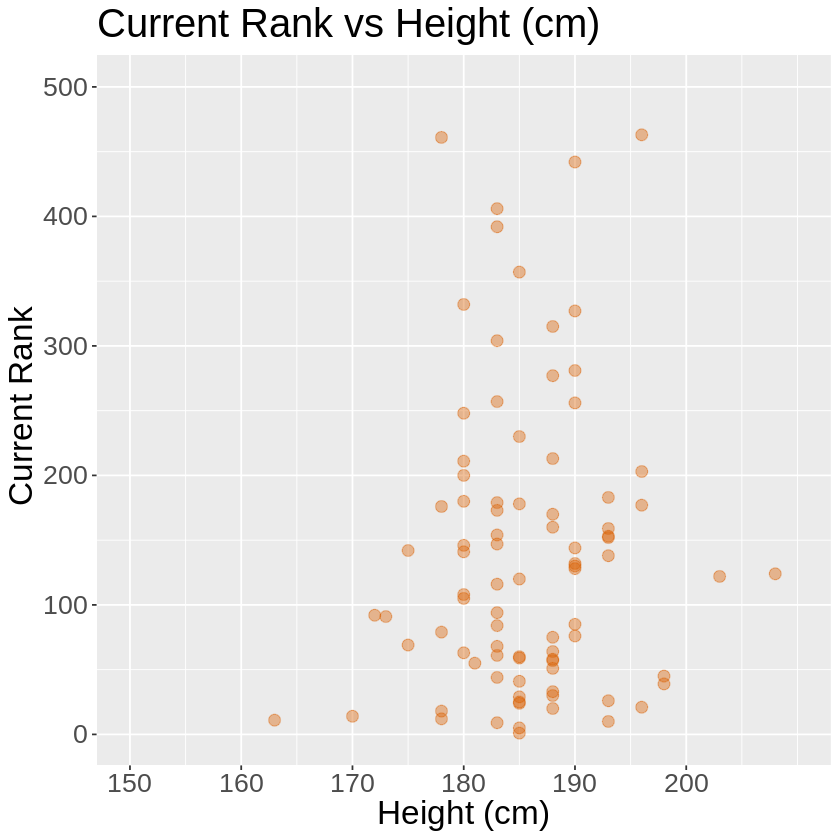

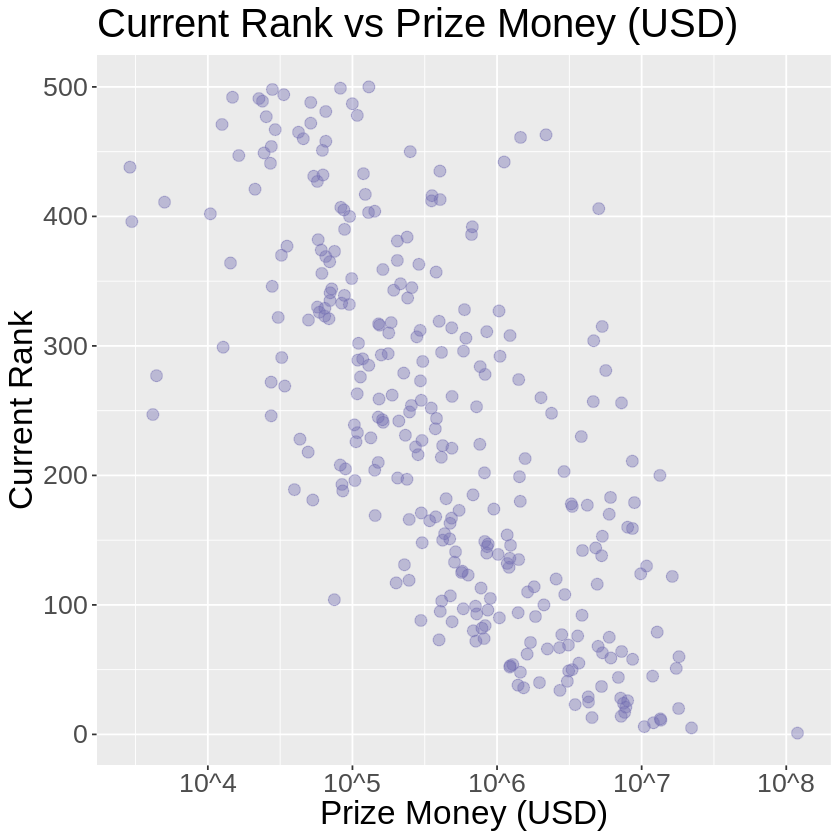

In [60]:
### Visualization Current rank with interesting variable


age_vs_rank <- ggplot(tennis_train, aes(x = Age, y = Current.Rank)) +
  geom_point(alpha = opacity,  color = color_palette[1], size = 3) +
  labs(x = "Age (Years old) ", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank

height_vs_rank <- ggplot(tennis_train, aes(x = Height, y = Current.Rank)) +
  geom_point(alpha = opacity, color = color_palette[2], size = 3) +
  labs(x = "Height (cm)", y = " Current Rank") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank



prize_vs_rank <- ggplot(tennis_train, aes(x = Prize.Money, y = Current.Rank)) +
  geom_point(alpha = opacity,  
             color = color_palette[3], 
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank






A weak and negative relationship between current rank and age is shown by the graph. 
<br>
A medium and positive relationship between current rank and height is shown by the graph.
<br>
A strong and negative relationship between current rank and height and prize money is shown by the graph.

Next, we want to see how catogrical variable can help predicting the current rank.

Warning message:
“Removed 65 rows containing missing values (geom_point).”
Warning message:
“Removed 286 rows containing missing values (geom_point).”


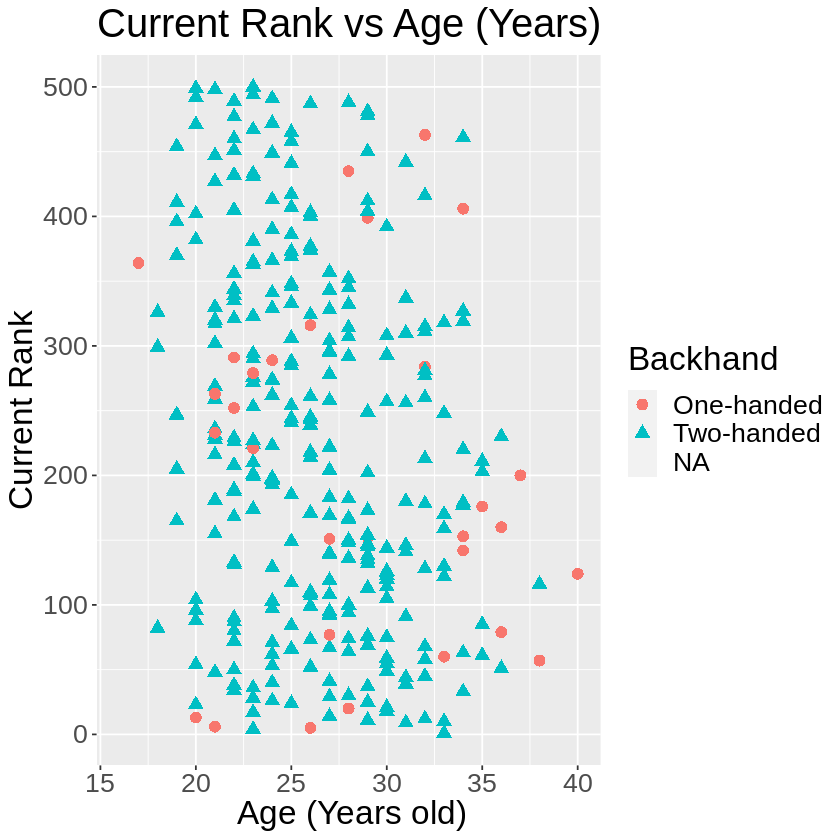

Warning message:
“Removed 81 rows containing missing values (geom_point).”


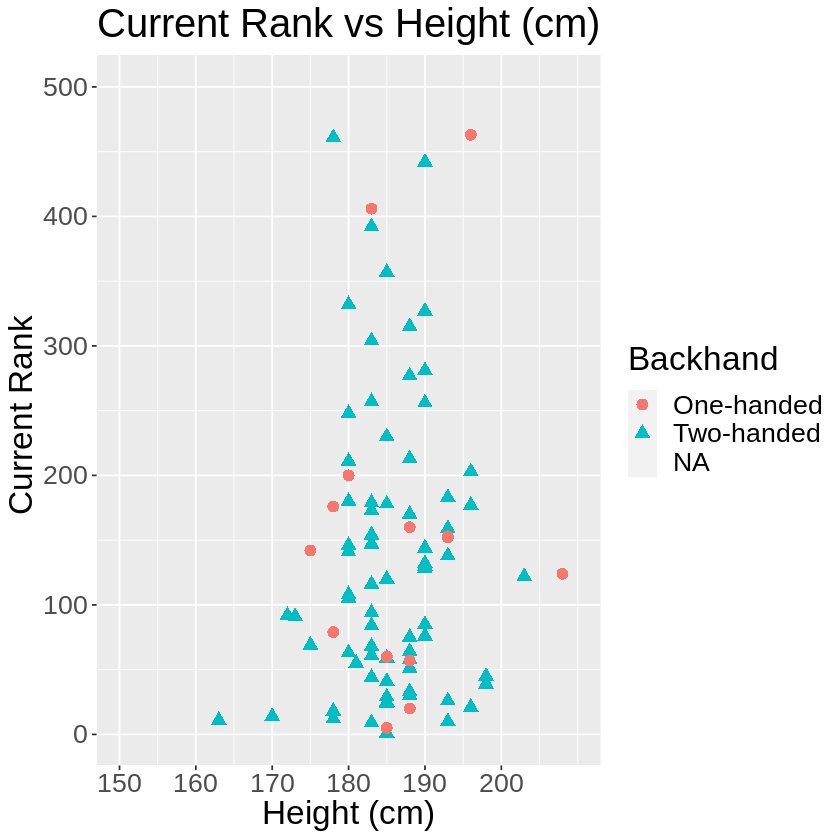

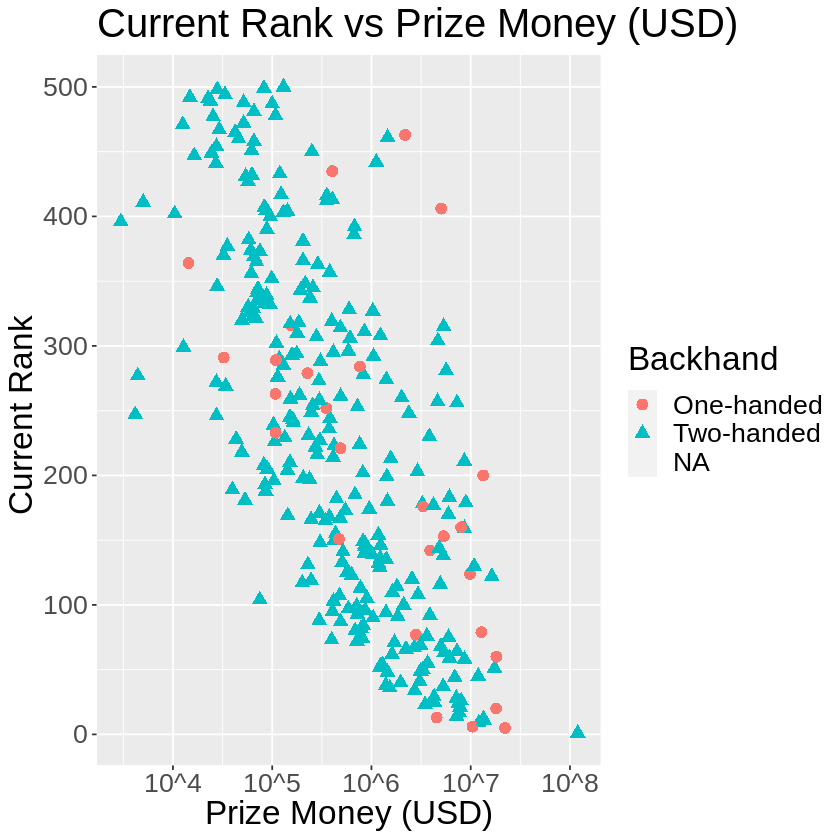

In [59]:
### color and label shape by backhandness

age_vs_rank_backhand <- ggplot(tennis_train, aes(x = Age,
                                                 y = Current.Rank, 
                                                 color = Backhand,
                                                shape = Backhand)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = " Age (Years old)", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank_backhand

height_vs_rank_backhand <- ggplot(tennis_train, aes(x = Height, 
                                           y = Current.Rank,
                                           color = Backhand,
                                           shape = Backhand)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm)", y = "Current Rank ") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank_backhand



prize_vs_rank_backhand <- ggplot(tennis_train, aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Backhand,
                                          shape = Backhand)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank ") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank_backhand

It can be observe that there is no particular pattern that implicate the relationship between backhandness and current rank.

In [41]:
## Create a new sub dataset focusing on the top 10 most popular country
top_10_country <- tennis_train |>
    select(Age, Current.Rank, Country) |>
    group_by(Country) |>
    summarise(count = n()) |>
    arrange(desc(count)) |>
    slice(1:10)
top_10_country

# Create a vector of allowed countries
allowed_countries <- c("United", "France", "Italy", "Germany", "Spain", "Argentina", "Australia", "Japan", "Russian", "Brazil")

# Mutate the Country column to "Others" if it's not in the allowed_countries vector
country_data <- tennis_train |>
  mutate(Country = factor(if_else(Country %in% allowed_countries, Country, factor("Others")))) #other country that are not in top 10 will be label as Others

country_data

Country,count
<fct>,<int>
United,37
France,34
Italy,31
Germany,26
Spain,25
Argentina,22
Australia,21
Japan,16
Russian,11


Warning message in `[<-.factor`(`*tmp*`, i, value = structure(1L, .Label = "Others", class = "factor")):
“invalid factor level, NA generated”


Prize.Money,Age,Country,Plays,Backhand,Height,Current.Rank
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
74927,20,NA,Right-handed,Two-handed,NA,104
NA,23,Russian,Right-handed,Two-handed,NA,4
1285541,20,NA,Right-handed,Two-handed,NA,54
2722314,22,United,Right-handed,Two-handed,NA,34
11912152,32,United,Right-handed,Two-handed,198,45
⋮,⋮,⋮,⋮,⋮,⋮,⋮
354975,32,NA,Right-handed,Two-handed,NA,416
57943,20,France,Right-handed,Two-handed,NA,382
NA,23,NA,Left-handed,NA,NA,495


Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 286 rows containing missing values (geom_point).”


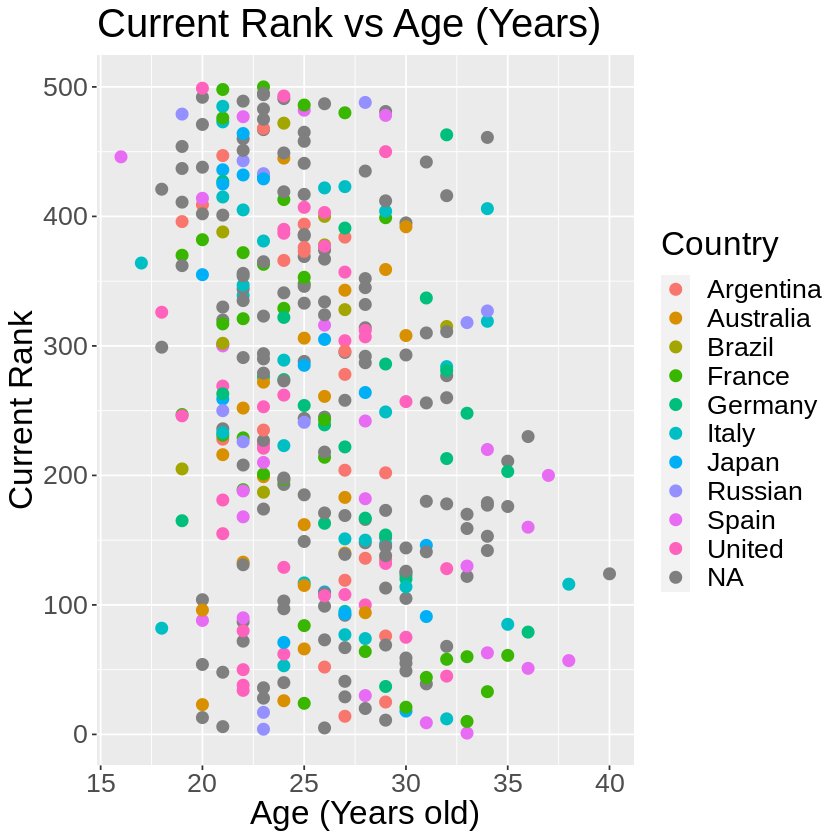

Warning message:
“Removed 73 rows containing missing values (geom_point).”


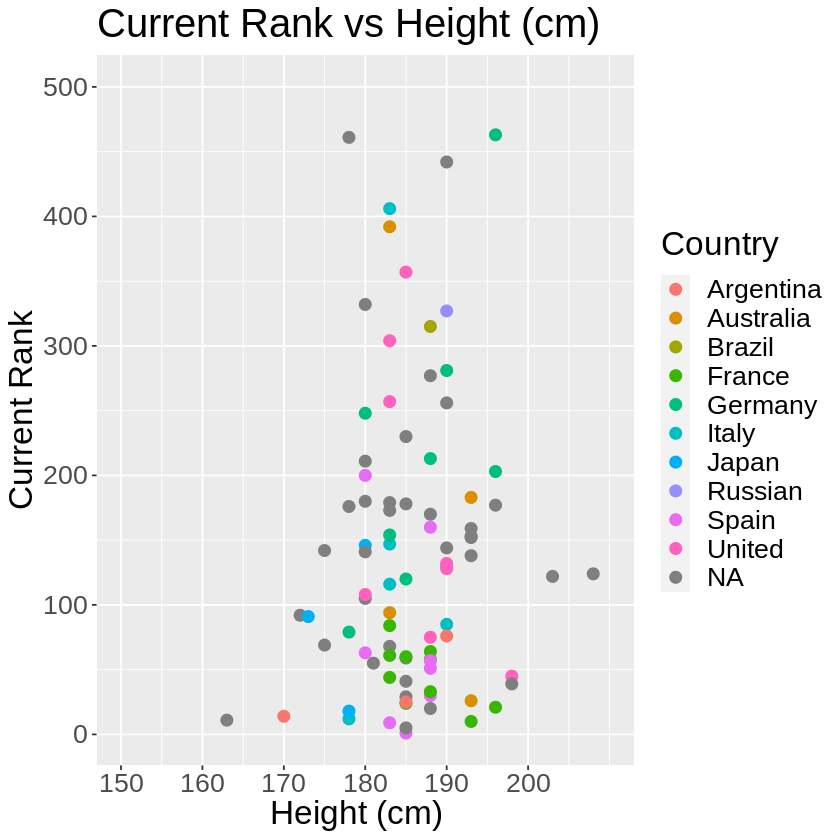

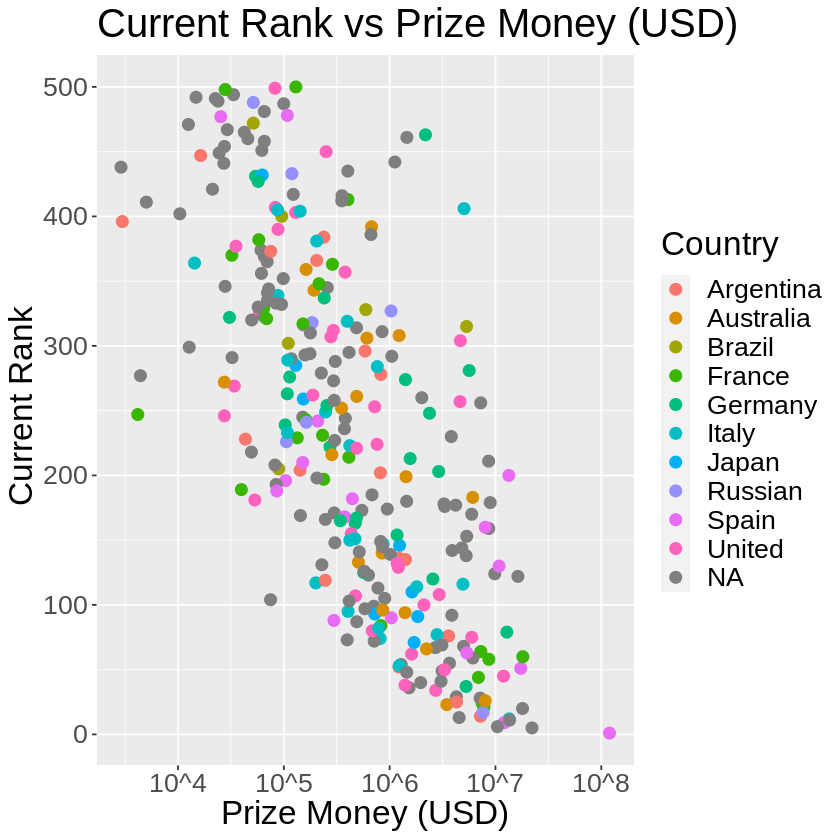

In [58]:
### color and label shape by Country

age_vs_rank_country <- ggplot(country_data, aes(x = Age,
                                                 y = Current.Rank, 
                                                 color = Country)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Age (Years old)", y = "Current Rank") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank_country

height_vs_rank_country <- ggplot(country_data, aes(x = Height, 
                                           y = Current.Rank,
                                           color = Country)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm)  ", y = "Current Rank") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank_country



prize_vs_rank_country <- ggplot(country_data, aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Country)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = " Current Rank") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank_country

There is no particular pattern that show the relationship between country and current rank.

Warning message:
“Removed 3 rows containing missing values (geom_point).”
Warning message:
“Removed 286 rows containing missing values (geom_point).”


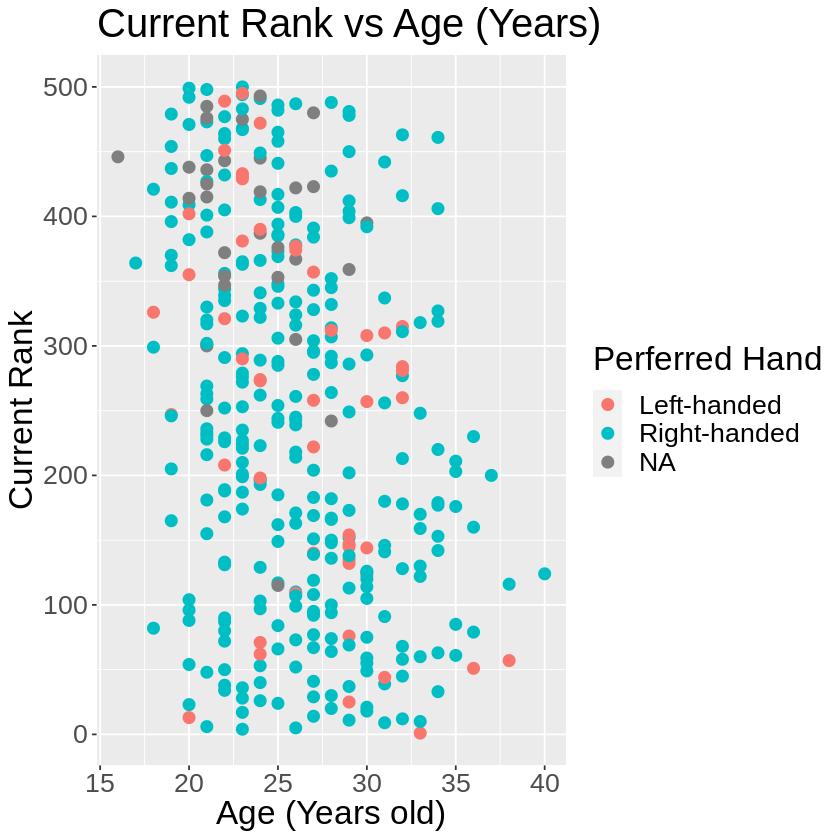

Warning message:
“Removed 73 rows containing missing values (geom_point).”


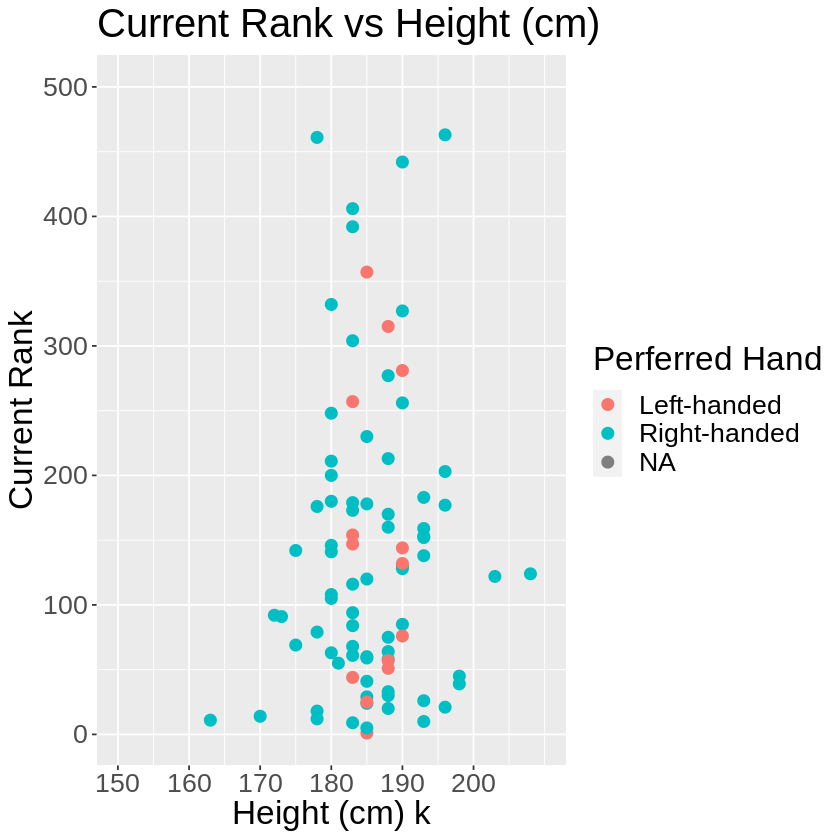

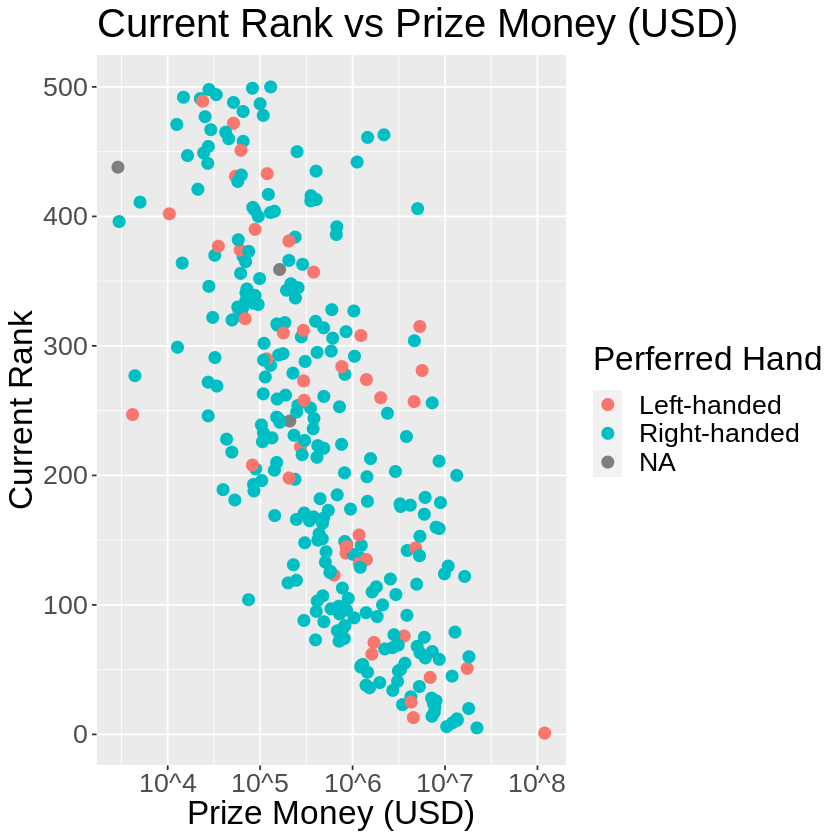

In [57]:
#coloring by prefered hand
age_vs_rank_hand <- ggplot(tennis_train, aes(x = Age,
                                                 y = Current.Rank, 
                                                 color = Plays)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Age (Years old)", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Age (Years)") +
  theme(text = element_text(size = 20)) 
age_vs_rank_hand

height_vs_rank_hand <- ggplot(tennis_train, aes(x = Height, 
                                           y = Current.Rank,
                                           color = Plays)) +
  geom_point(alpha = 1, size = 3) +
  labs(x = "Height (cm) k", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Height (cm)") +
  theme(text = element_text(size = 20)) +
  scale_x_continuous(limits = c(150, 210), breaks = seq(150, 200, by = 10))

height_vs_rank_hand



prize_vs_rank_hand <- ggplot(tennis_train, aes(x = Prize.Money,
                                          y = Current.Rank,
                                          color = Plays)) +
  geom_point(alpha = 1,   
             size = 3,) +
  labs(x = "Prize Money (USD)", y = "Current Rank", color = "Perferred Hand") +
  ggtitle("Current Rank vs Prize Money (USD)") +
  scale_x_log10(labels = function(x) sprintf("10^%d", log10(x)), breaks = c(1e3, 1e4, 1e5, 1e6, 1e7, 1e8)) +
  theme(text = element_text(size = 20))

prize_vs_rank_hand

There is no pattern showing the relationship between the current rank and perferred hand

Since there is no correlation between current rank, and country, backhandness or perferred hand, we would ignore these variable and choose the age, height, and prize money to be our variable of interest

### Methods
Explain how you will conduct either your data analysis and which variables/columns you will use.

<u> Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction? </u>

Describe at least one way that you will visualize the results

### Expected outcomes and significance:

What do you expect to find?

What impact could such findings have?

What future questions could this lead to?